In [1]:
%matplotlib inline
# ^^ ensures plots are displayed in the notebook
import matplotlib.pyplot as plt
import numpy as np

In [99]:
def display(grid):
    cmap = plt.cm.colors.ListedColormap(['white', 'red', 'blue'])
    plt.imshow(grid, cmap=cmap, interpolation='nearest')
    # offset grid lines by half
    plt.xticks(np.arange(-0.5, len(grid[0]), 1), [])
    plt.yticks(np.arange(-0.5, len(grid), 1), [])
    # show grid lines
    plt.grid(True, which='both', color='black', linestyle='-', linewidth=1)
    plt.show()

# this function displays the colours wrong when only player 1 has moved. it displays 0 as white and 1 as red.
# any other time it works as expected.
# i'm guessing this is because of how ListedColormap works
# i'm just gonna say this is fine because this function doesn't *really* matter, and any other solution I can find
# seems way more complicated

In [83]:
grid = np.array([
    [0, 1, 2, 1, 0],
    [2, 0, 1, 2, 1],
    [1, 2, 0, 1, 2],
    [2, 1, 0, 2, 1],
    [0, 2, 1, 0, 2]
])

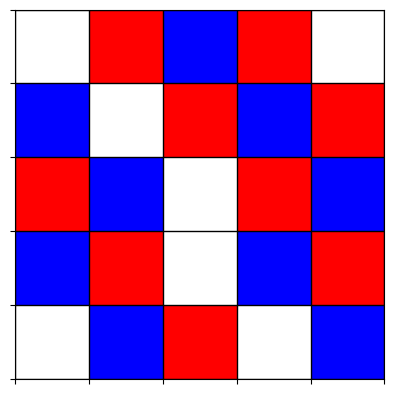

In [84]:
display(grid)

In [93]:
def invert_1_2(x):
    return x ^ 3
    
vinvert_1_2 = np.vectorize(invert_1_2)

def empty_board():
    return np.zeros((6, 7), dtype=np.int32)

class Board:
    def __init__(self):
        self.state = empty_board()
        self.player = 1

    def update_player(self):
        self.player = invert_1_2(self.player)

    def play(self, col):
        def try_play(row):
            if row == -1:
                return False
            elif self.state[row][col] == 0:
                self.state[row][col] = self.player
                # check for win here
                # check if we have a run of 4 adjacent (in state range and same value as self.player) values
                self.update_player() 
                return True
            else:
                try_play(row - 1)

        try_play(self.last_row())

    def invert(self):
        self.state = vinvert_1_2(self.state)

    def last_row(self):
        return self.state.shape[0] - 1
        
    @staticmethod
    def empty_board():
        return np.zeros((6, 7), dtype=int)


In [101]:
board = Board()
board.state

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=int32)

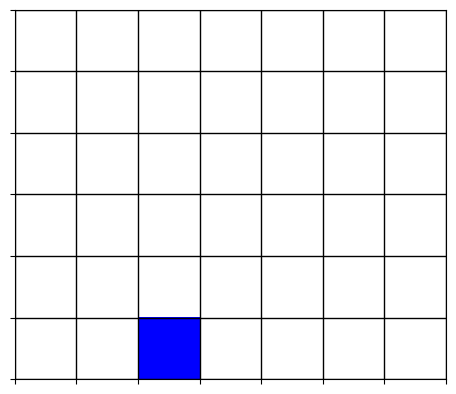

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0]], dtype=int32)

In [102]:
board.play(2)
display(board.state)
board.state